In [87]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [67]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [68]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(2)
df['MedHouseValue'] = housing.target

In [5]:
df.shape

(20640, 9)

In [6]:
df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [8]:
df.dropna(axis=0, how='all', inplace=True)
df.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


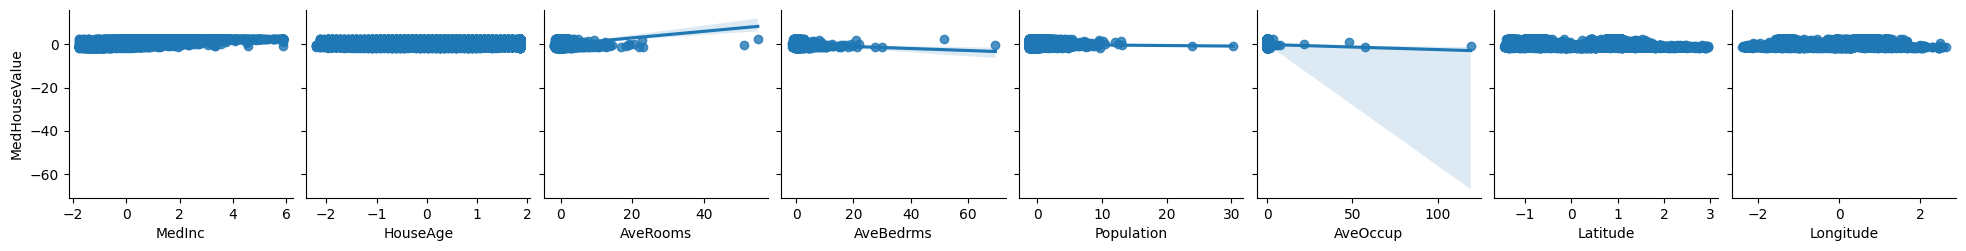

In [70]:
sns.pairplot(df,x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'], y_vars='MedHouseValue', kind='reg')

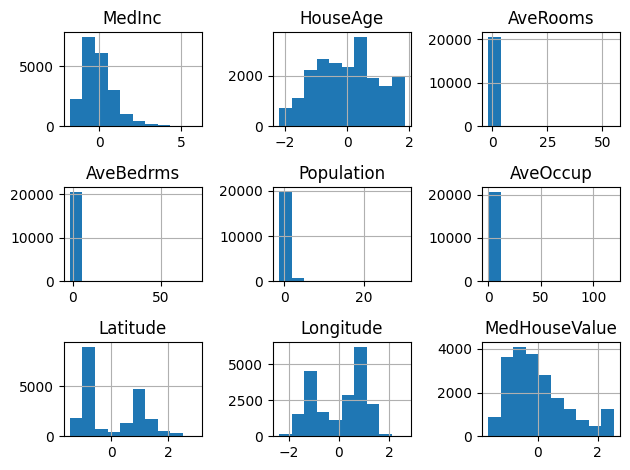

In [71]:
df.hist()
plt.tight_layout()
plt.show()

<Axes: >

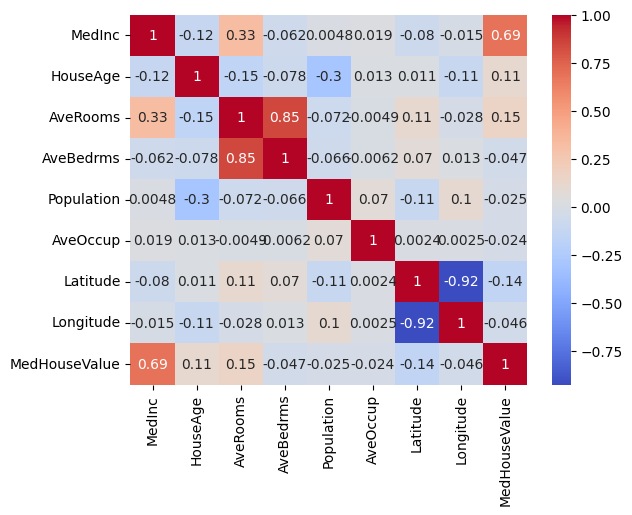

In [72]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [73]:
X = df.iloc[:, :-1]
#X = df.loc[:,['MedInc', 'HouseAge', 'AveRooms','Latitude']]
#X = df[['MedInc', 'HouseAge', 'AveRooms','Latitude']]
y_true = df.iloc[:, -1]
y_true

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: MedHouseValue, Length: 20640, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=.2, random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


In [92]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [77]:
y_t = pd.DataFrame(y_test)
rows_with_nan = y_t[y_t.isna().any(axis=1)]


In [78]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
print(f'coef: {model.coef_} intercept: {model.intercept_}')

coef: [ 0.73867827  0.10605706 -0.26441499  0.32162476 -0.00199182 -0.03173822
 -0.77702845 -0.75301636] intercept: -0.0006030354213707022


In [94]:
y_pred = model.predict(X_test)

In [96]:
rmse = root_mean_squared_error(y_test, y_pred)
r2_value = r2_score(y_test,y_pred)
print(f"rmse: {rmse}")
print(f"r2_score: {r2_value}")
# all: 0.575787706032451
# 3 columns: 0.5043169272470043

rmse: 0.6461245859158666
r2_score: 0.5757877060324509


In [98]:
df2 = pd.concat([y_test,pd.Series(y_pred), pd.Series(y_test-y_pred)], axis=1)
df2.columns = ['observed', 'predicted', 'residual']
df2

,observed,predicted,residual
0,-1.379252,-1.169427,-0.209825
1,-1.395718,-0.263917,-1.131801
2,2.540411,0.555581,1.984830
3,0.101776,0.667605,-0.565829
4,0.616539,0.464586,0.151953
...,...,...,...
4123,0.489148,-0.066566,0.555714
4124,0.519479,0.157099,0.362380
4125,2.540411,2.080036,0.460375
4126,-1.166067,-0.763520,-0.402548


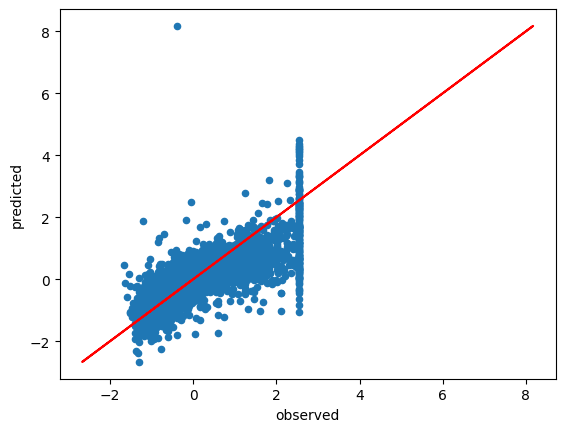

In [99]:
df2.plot.scatter(x='observed', y='predicted')
plt.plot(df2['predicted'], df2['predicted'], color='red')

array([[<Axes: title={'center': 'observed'}>,
        <Axes: title={'center': 'predicted'}>],
       [<Axes: title={'center': 'residual'}>, <Axes: >]], dtype=object)

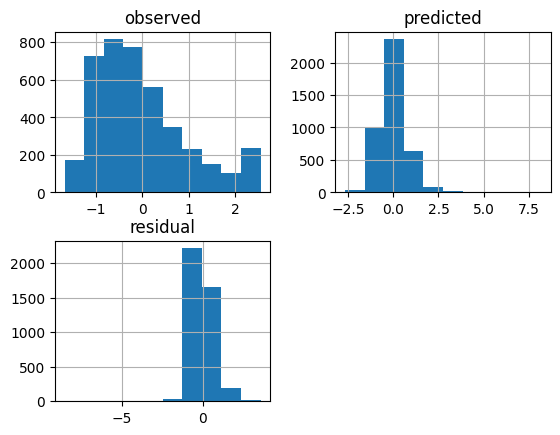

In [84]:
df2.hist()

In [ ]:
X2 = sm.add_constant(X_test) # add intercept into X
est = sm.OLS(y_test, X2) # original Least Squares
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          MedHouseValue   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     759.7
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:01:54   Log-Likelihood:                -3953.4
No. Observations:                4128   AIC:                             7925.
Df Residuals:                    4119   BIC:                             7982.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.010     -0.349      0.7